In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# 데이터 파일 경로 설정
data_file_path = "C:/Users/wdd45/OneDrive/바탕 화면/딥러닝응용/DailyDelhiClimateTrain.csv"


In [2]:
# 데이터 파일 로드
df = pd.read_csv(data_file_path)

In [3]:
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [4]:
# 데이터 전처리
data = df[['humidity', 'wind_speed', 'meanpressure']].values  # 'meantemp' 제외
target = df['meantemp'].values

In [5]:
# 데이터 정규화
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
target = target.reshape(-1, 1)
target = scaler.fit_transform(target)

In [6]:
# 시퀀스 길이 설정 및 데이터를 훈련 및 테스트 세트로 분할
sequence_length = 10
sequences = []
target_sequences = []
for i in range(len(data) - sequence_length):
    sequences.append(data[i:i+sequence_length])
    target_sequences.append(target[i+sequence_length])

X = np.array(sequences)
y = np.array(target_sequences)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# LSTM 모델 생성
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, data.shape[1])))
model.add(Dense(1))


In [9]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [10]:
# 모델 훈련
model.fit(X_train, y_train, epochs=50, batch_size=64)


Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
19/19 [==============================] - 3s 10ms/step - loss: 0.3834
Epoch 2/50
19/19 [==============================] - 0s 10ms/step - loss: 0.1383
Epoch 3/50
19/19 [==============================] - 0s 8ms/step - loss: 0.0579
Epoch 4/50
19/19 [==============================] - 0s 9ms/step - loss: 0.0410
Epoch 5/50
19/19 [==============================] - 0s 9ms/s

In [11]:
# 모델 평가
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"훈련 손실: {train_loss:.4f}")
print(f"테스트 손실: {test_loss:.4f}")


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
훈련 손실: 0.0271
테스트 손실: 0.0303


In [12]:
# 예측 생성
predicted = model.predict(X_test)


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
10/10 [==============================] - 0s 4ms/step


In [13]:
# 실제 meantemp를 얻기 위해 데이터를 역변환
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test)


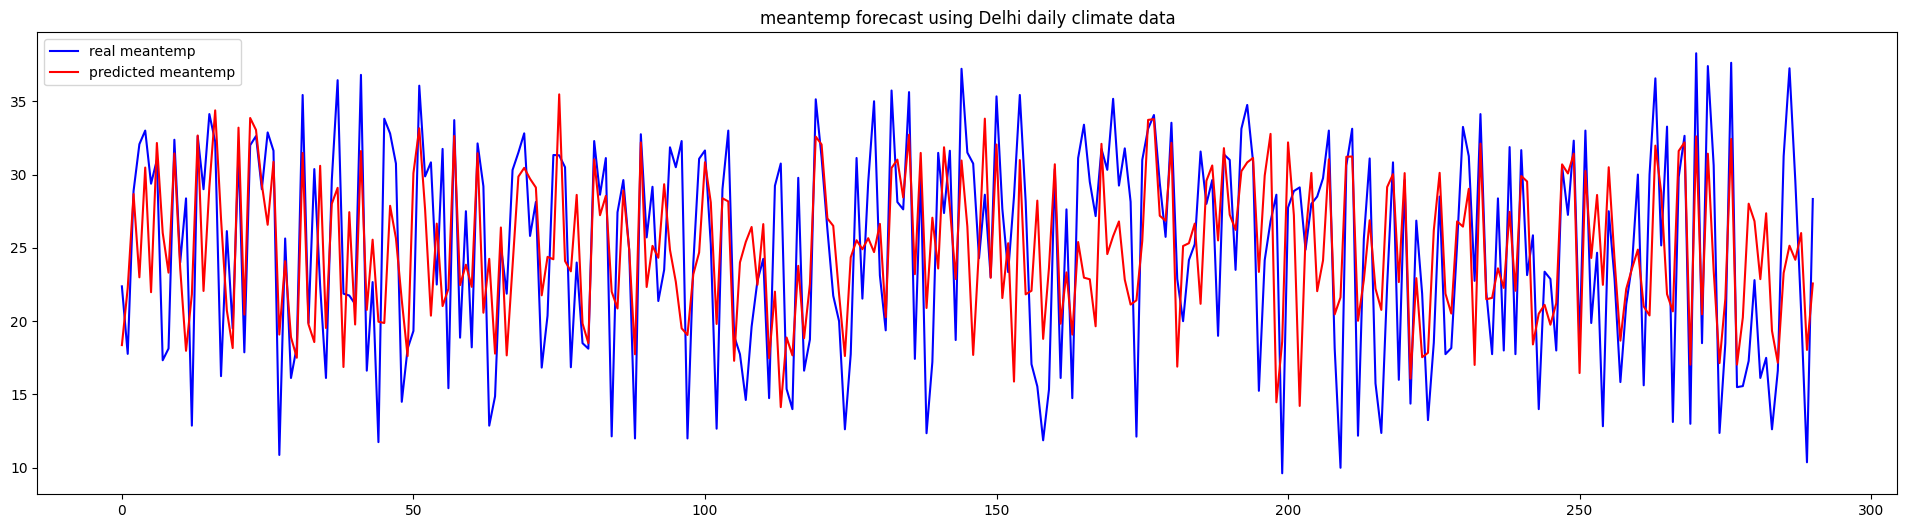

In [17]:
# 결과를 그래프로 나타냄
plt.figure(figsize=(24, 6))
plt.plot(y_test, label='real meantemp', color='blue')
plt.plot(predicted, label='predicted meantemp', color='red')
plt.title('meantemp forecast using Delhi daily climate data')
plt.legend()
plt.show()

In [18]:
## GRU모델

In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
import matplotlib.pyplot as plt

# 데이터 파일 경로 설정
data_file_path = "C:/Users/wdd45/OneDrive/바탕 화면/딥러닝응용/DailyDelhiClimateTrain.csv"

# 데이터 파일 로드
df = pd.read_csv(data_file_path)

In [20]:
# 데이터 전처리
data = df[['humidity', 'wind_speed', 'meanpressure']].values  # 'meantemp' 제외
target = df['meantemp'].values


In [21]:
# 데이터 정규화
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
target = target.reshape(-1, 1)
target = scaler.fit_transform(target)


In [22]:
# 시퀀스 길이 설정 및 데이터를 훈련 및 테스트 세트로 분할
sequence_length = 10
sequences = []
target_sequences = []
for i in range(len(data) - sequence_length):
    sequences.append(data[i:i+sequence_length])
    target_sequences.append(target[i+sequence_length])

X = np.array(sequences)
y = np.array(target_sequences)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# GRU 모델 생성
model = Sequential()
model.add(GRU(50, activation='relu', input_shape=(sequence_length, data.shape[1])))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [26]:
# 모델 훈련
model.fit(X_train, y_train, epochs=50, batch_size=64)


Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
19/19 [==============================] - 2s 4ms/step - loss: 0.2045
Epoch 2/50
19/19 [==============================] - 0s 4ms/step - loss: 0.0718
Epoch 3/50
19/19 [==============================] - 0s 4ms/step - loss: 0.0578
Epoch 4/50
19/19 [==============================] - 0s 4ms/step - loss: 0.0451
Epoch 5/50
19/19 [==============================] - 0s 4ms/ste

In [27]:
# 모델 평가
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"훈련 손실: {train_loss:.4f}")
print(f"테스트 손실: {test_loss:.4f}")


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
훈련 손실: 0.0277
테스트 손실: 0.0322


In [28]:
# 예측 생성
predicted = model.predict(X_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
10/10 [==============================] - 0s 2ms/step


In [29]:
# 실제 meantemp를 얻기 위해 데이터를 역변환
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test)


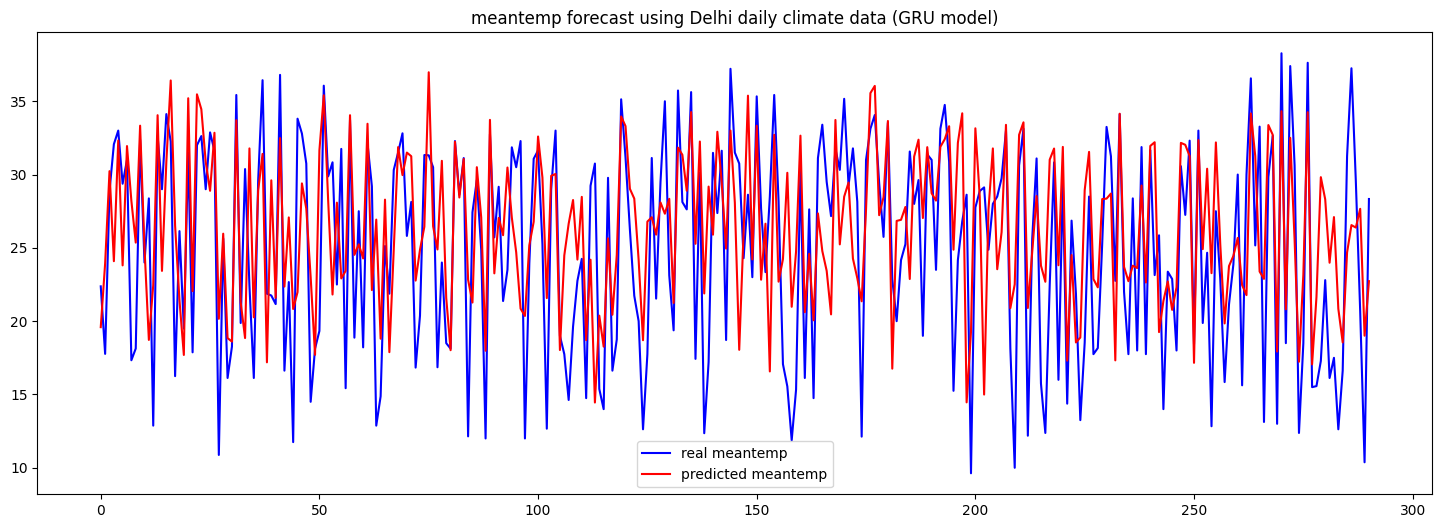

In [34]:
# 결과를 그래프로 나타냄
plt.figure(figsize=(18, 6))
plt.plot(y_test, label='real meantemp', color='blue')
plt.plot(predicted, label='predicted meantemp', color='red')
plt.title('meantemp forecast using Delhi daily climate data (GRU model)')
plt.legend()
plt.show()

In [35]:
################################ CNN모델 ############################

In [36]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# 데이터 파일 경로 설정
data_file_path = "C:/Users/wdd45/OneDrive/바탕 화면/딥러닝응용/DailyDelhiClimateTrain.csv"

# 데이터 파일 로드
df = pd.read_csv(data_file_path)

In [37]:
# 데이터 전처리
data = df[['humidity', 'wind_speed', 'meanpressure']].values  # 'meantemp' 제외
target = df['meantemp'].values


In [38]:
# 데이터 정규화
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
target = target.reshape(-1, 1)
target = scaler.fit_transform(target)

In [39]:
# 데이터를 이미지로 변환
sequence_length = 10  # 10일 동안의 데이터를 이미지로 표현
image_data = []
target_data = []
for i in range(len(data) - sequence_length):
    sequence = data[i:i+sequence_length]
    image_data.append(sequence)
    target_data.append(target[i+sequence_length])

image_data = np.array(image_data)
target_data = np.array(target_data)


In [40]:
# 시퀀스 데이터를 이미지로 변환 (10일치 데이터를 하나의 이미지로)
image_data = image_data.reshape(-1, sequence_length, data.shape[1], 1)


In [41]:
# 데이터를 훈련 및 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(image_data, target_data, test_size=0.2, random_state=42)


In [46]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(sequence_length, data.shape[1], 1)))
model.add(MaxPooling2D((1, 1)))  # MaxPooling 레이어를 건너뛰도록 수정
model.add(Flatten())
model.add(Dense(1))


In [47]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [48]:
# 모델 훈련
model.fit(X_train, y_train, epochs=50, batch_size=64)


Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
19/19 [==============================] - 0s 2ms/step - loss: 0.2124
Epoch 2/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0959
Epoch 3/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0677
Epoch 4/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0442
Epoch 5/50
19/19 [==============================] - 0s 2ms/ste

In [49]:
# 모델 평가
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"훈련 손실: {train_loss:.4f}")
print(f"테스트 손실: {test_loss:.4f}")


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
훈련 손실: 0.0270
테스트 손실: 0.0317


In [50]:
# 예측 생성
predicted = model.predict(X_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
10/10 [==============================] - 0s 1ms/step


In [51]:
# 실제 meantemp를 얻기 위해 데이터를 역변환
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test)


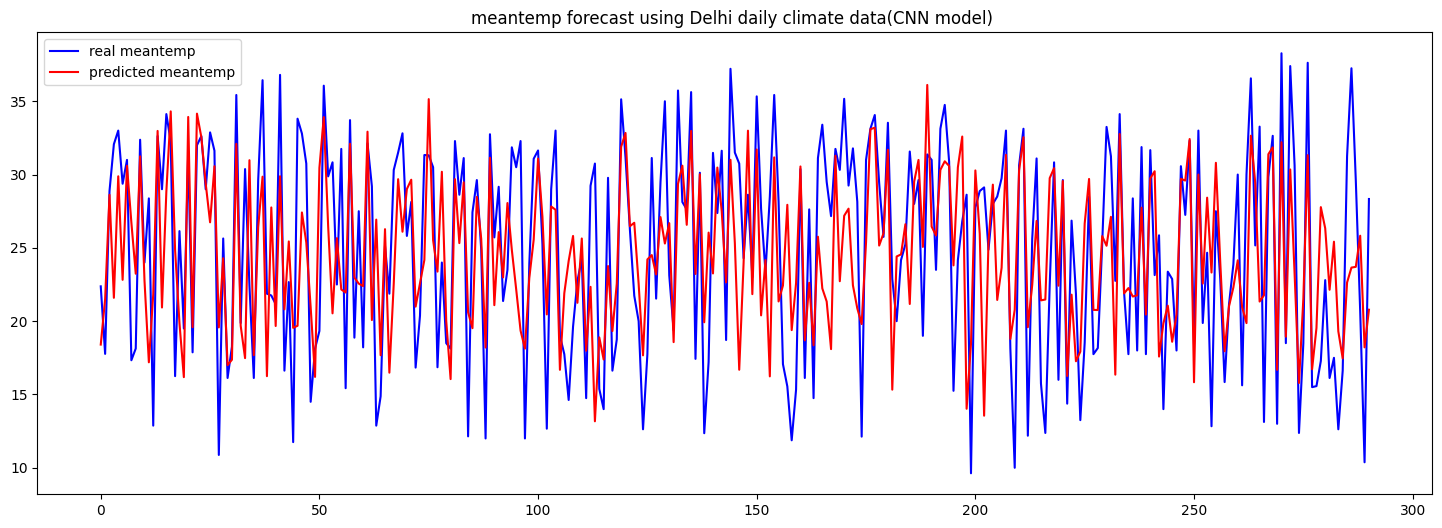

In [53]:
# 결과를 그래프로 나타냄
plt.figure(figsize=(18, 6))
plt.plot(y_test, label='real meantemp', color='blue')
plt.plot(predicted, label='predicted meantemp', color='red')
plt.title('meantemp forecast using Delhi daily climate data(CNN model) ')
plt.legend()
plt.show()